       Gamma                              Model Name  Training Error  \
0   0.031250              SVM (C=0.1, gamma=0.03125)        0.758286   
1   0.015625             SVM (C=0.1, gamma=0.015625)        0.758286   
2   0.007812            SVM (C=0.1, gamma=0.0078125)        0.724239   
3   0.003906           SVM (C=0.1, gamma=0.00390625)        0.490643   
4   0.001953          SVM (C=0.1, gamma=0.001953125)        0.255017   
5   0.000977         SVM (C=0.1, gamma=0.0009765625)        0.111838   
6   0.000488        SVM (C=0.1, gamma=0.00048828125)        0.110710   
7   0.000244       SVM (C=0.1, gamma=0.000244140625)        0.110936   
8   0.000122      SVM (C=0.1, gamma=0.0001220703125)        0.119278   
9   0.000061      SVM (C=0.1, gamma=6.103515625e-05)        0.130327   
10  0.000031     SVM (C=0.1, gamma=3.0517578125e-05)        0.144307   
11  0.000015    SVM (C=0.1, gamma=1.52587890625e-05)        0.157384   
12  0.000008    SVM (C=0.1, gamma=7.62939453125e-06)        0.17

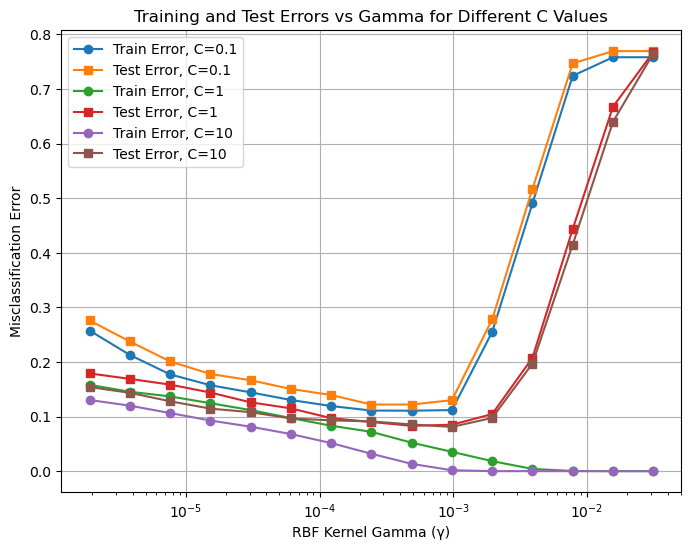

In [13]:
import warnings
warnings.filterwarnings('ignore')

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Y = np.loadtxt(r"C:\Users\basak\Documents\MS-Data Science\Spring-2025\Python\ML HW\dataset\satimage\Y.dat")
X = np.loadtxt(r"C:\Users\basak\Documents\MS-Data Science\Spring-2025\Python\ML HW\dataset\satimage\X.dat")
Y_test = np.loadtxt(r"C:\Users\basak\Documents\MS-Data Science\Spring-2025\Python\ML HW\dataset\satimage\Ytest.dat")
X_test = np.loadtxt(r"C:\Users\basak\Documents\MS-Data Science\Spring-2025\Python\ML HW\dataset\satimage\Xtest.dat")

C_values = [0.1, 1, 10]
i_values = list(range(5, 20))
gamma_values = [2**-i for i in i_values]

train_error = {C: [] for C in C_values}
test_error = {C: [] for C in C_values}
model_names = {C: [] for C in C_values}
times = {C: [] for C in C_values}
gamma_list = {C: [] for C in C_values} 

for C in C_values:
    for gamma in gamma_values:
        start_time = time.time()
        model = SVC(C=C, kernel='rbf', gamma=gamma, random_state=42)
        model.fit(X, Y)

        train_err = 1 - model.score(X, Y)
        test_err = 1 - model.score(X_test, Y_test)

        total_t = time.time() - start_time

        model_names[C].append(f"SVM (C={C}, gamma={gamma})")
        train_error[C].append(train_err)
        test_error[C].append(test_err)
        times[C].append(total_t)
        gamma_list[C].append(gamma)  
        
        results_df = pd.DataFrame({
            "Gamma": gamma_list[C],
            "Model Name": model_names[C],  
            "Training Error": train_error[C],
            "Test Error": test_error[C],
            "Training Time (s)": times[C],
        })

    print(results_df)

best_results = []
for C in C_values:
    min_test_error_idx = np.argmin(test_error[C])
    best_combination = {
        "Gamma": gamma_list[C][min_test_error_idx],
        "Model Name": f"SVM (C={C})",
        "Training Error": train_error[C][min_test_error_idx],
        "Test Error": test_error[C][min_test_error_idx],
        "Total Training Time (s)": times[C][min_test_error_idx],
    }

best_results_df = pd.DataFrame([best_combination])
print(best_results_df)

plt.figure(figsize=(8, 6))
for C in C_values:
    plt.semilogx(gamma_values, train_error[C], label=f'Train Error, C={C}', marker='o')
    plt.semilogx(gamma_values, test_error[C], label=f'Test Error, C={C}', marker='s')

plt.xlabel('RBF Kernel Gamma (γ)')
plt.ylabel('Misclassification Error')
plt.title('Training and Test Errors vs Gamma for Different C Values')
plt.legend()
plt.grid()
plt.show()
